# Quality Check Diagnostic Work

## Step 1: Load in Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from engie_QC import EngieQC
from examples.turbine_analysis.engie_project import TurbineEngieOpenData
from operational_analysis.methods.quality_check_automation import QCAuto
import pandas as pd
import numpy as np

In [3]:
scada_df = pd.read_csv('engie_scada.csv')

### Let's take a look at our scada data here:

In [4]:
scada_df.head()

,time,time.1,wtur_W_avg,wmet_wDir_avg,wmet_wdspd_avg,ID
0,2013-01-01 00:00:00,2013-01-01 00:00:00,1303.77,174.13000,9.479999,R80711
1,2013-01-01 00:10:00,2013-01-01 00:10:00,1276.15,173.53000,9.240000,R80711
2,2013-01-01 00:20:00,2013-01-01 00:20:00,1286.34,172.52000,9.190000,R80711
3,2013-01-01 00:30:00,2013-01-01 00:30:00,1081.10,170.12000,8.460000,R80711
4,2013-01-01 00:40:00,2013-01-01 00:40:00,1062.01,171.89999,8.490000,R80711


### We have an extra time column that we want to remove. Let's do that with the "drop" method.

In [5]:
scada_df.drop(columns = 'time.1', inplace=True, axis=1)

### Let's also check the datatypes for each column.

In [6]:
scada_df.dtypes

time               object
wtur_W_avg        float64
wmet_wDir_avg     float64
wmet_wdspd_avg    float64
ID                 object
dtype: object

### It looks like we need to convert our 'time' column to a datetime. Let's do that and then set 'time' as our index:

In [7]:
scada_df['time'] = pd.to_datetime(scada_df['time'])
scada_df.set_index('time', inplace=True, drop=False)

### One last check:

In [8]:
scada_df.head()

,time,wtur_W_avg,wmet_wDir_avg,wmet_wdspd_avg,ID
time,,,,,
2013-01-01 00:00:00,2013-01-01 00:00:00,1303.77,174.13000,9.479999,R80711
2013-01-01 00:10:00,2013-01-01 00:10:00,1276.15,173.53000,9.240000,R80711
2013-01-01 00:20:00,2013-01-01 00:20:00,1286.34,172.52000,9.190000,R80711
2013-01-01 00:30:00,2013-01-01 00:30:00,1081.10,170.12000,8.460000,R80711
2013-01-01 00:40:00,2013-01-01 00:40:00,1062.01,171.89999,8.490000,R80711


## Step 2: Initializing QC and Performing the Run Method

### Now that we have our dataset with the necessary columns and datatypes, we are ready to perform our quality check diagnostic. This analysis will not make the adjustments for us, but it will allow us to quickly flag some key irregularities that we need to manage before going on. 

### To start, let's initialize a QCAuto object, qc, and call its run method. 

In [9]:
qc = QCAuto(scada_df = scada_df, ws_field = 'wmet_wdspd_avg', power_field= 'wtur_W_avg', time_field = 'time', id_field= 'ID', freq = '10T', lat_lon = (42,-90))

INFO:operational_analysis.methods.quality_check_automation:Initializing QC_Automation Object


In [10]:
qc.run()

INFO:operational_analysis.methods.quality_check_automation:Determining dtype values
INFO:operational_analysis.methods.quality_check_automation:Identifying Nans
INFO:operational_analysis.methods.quality_check_automation:Identifying Time Duplications
INFO:operational_analysis.methods.quality_check_automation:Identifying Time Gaps
INFO:operational_analysis.methods.quality_check_automation:Evaluating timezone deviation from UTC
INFO:root:GET: https://developer.nrel.gov/api/hsds// [/nrel/wtk-us.h5]
INFO:root:status: 200
INFO:root:got domain json: {'root': 'g-d146c6be-85f3-11e7-bf89-0242ac110008', 'class': 'domain', 'owner': 'nrel_admin', 'created': 1503266789.3004835, 'limits': {'min_chunk_size': 1048576, 'max_chunk_size': 8388608, 'max_request_size': 104857600, 'max_chunks_per_request': 1000}, 'version': '0.3', 'lastModified': 1503266789.3004835, 'hrefs': [{'rel': 'self', 'href': 'https://developer.nrel.gov/api/hsds/?domain=/nrel/wtk-us.h5'}, {'rel': 'database', 'href': 'https://developer.

y,x indices for project: 		 (1000, 1727)
Coordinates of project: 	 (42, -90)


INFO:root:status: 200
INFO:root:returning binary content, length: 47616
INFO:root:binary response, 47616 bytes
INFO:root:got arr: (2976,), cleaning up shape
INFO:root:GET: https://developer.nrel.gov/api/hsds//groups/g-d146c6be-85f3-11e7-bf89-0242ac110008/links/windspeed_80m [/nrel/wtk-us.h5]


Coordinates of project: 	 (42.005676, -90.002197)


INFO:root:status: 200
INFO:root:GET: https://developer.nrel.gov/api/hsds//datasets/d-d29fda32-85f3-11e7-bf89-0242ac110008 [/nrel/wtk-us.h5]
INFO:root:status: 200
INFO:root:selection: start (0, 1000, 1727) stop [61344, 1001, 1728] step (1, 1, 1)
INFO:root:page_stop: 61344
INFO:root:page_mshape: (61344,)
INFO:root:GET: https://developer.nrel.gov/api/hsds//datasets/d-d29fda32-85f3-11e7-bf89-0242ac110008/value [/nrel/wtk-us.h5]
INFO:root:status: 413
INFO:root:Got response: 413
INFO:root:got IOError: 413
INFO:root:New chunks_per_page: 1278
INFO:root:page_stop: 30672
INFO:root:page_mshape: (30672,)
INFO:root:GET: https://developer.nrel.gov/api/hsds//datasets/d-d29fda32-85f3-11e7-bf89-0242ac110008/value [/nrel/wtk-us.h5]
INFO:root:status: 413
INFO:root:Got response: 413
INFO:root:got IOError: 413
INFO:root:New chunks_per_page: 639
INFO:root:page_stop: 15336
INFO:root:page_mshape: (15336,)
INFO:root:GET: https://developer.nrel.gov/api/hsds//datasets/d-d29fda32-85f3-11e7-bf89-0242ac110008/value

## Step 3: Deep Dive with QC Diagnostic Results

### Let's take a deeper look at the results of our QC diagnostic. 

### We can start by doing a general scan of the range values and overall distribution for each column:

<Figure size 864x576 with 0 Axes>

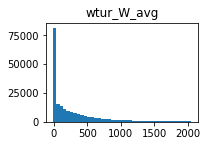

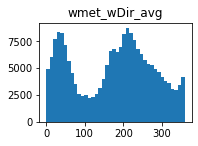

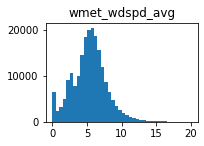

In [11]:
qc.column_plots()

In [12]:
qc._max_min

,max,min
time,2013-12-31 00:00:00,2013-01-01 00:00:00
wtur_W_avg,2051.38,-16.9
wmet_wDir_avg,360,0
wmet_wdspd_avg,20.01,0
ID,R80790,R80711


### These values look fairly reasonable and consistent. 

### Now we can peak into the timeseries data. Specifically, we want to determine the timezone and see how (if at all) Daylight Savings Time (DST) was accounted for in this dataset.

### Let's start this process by identifying any timestamp duplications and timestamp gaps. Duplications in October and gaps in March would suggest DST.

In [13]:
qc._time_duplications 

time
2013-03-31 01:00:00   2013-03-31 01:00:00
2013-03-31 01:10:00   2013-03-31 01:10:00
2013-03-31 01:20:00   2013-03-31 01:20:00
2013-03-31 01:30:00   2013-03-31 01:30:00
2013-03-31 01:40:00   2013-03-31 01:40:00
2013-03-31 01:50:00   2013-03-31 01:50:00
2013-03-31 01:00:00   2013-03-31 01:00:00
2013-03-31 01:10:00   2013-03-31 01:10:00
2013-03-31 01:20:00   2013-03-31 01:20:00
2013-03-31 01:30:00   2013-03-31 01:30:00
2013-03-31 01:40:00   2013-03-31 01:40:00
2013-03-31 01:50:00   2013-03-31 01:50:00
2013-03-31 01:00:00   2013-03-31 01:00:00
2013-03-31 01:10:00   2013-03-31 01:10:00
2013-03-31 01:20:00   2013-03-31 01:20:00
2013-03-31 01:30:00   2013-03-31 01:30:00
2013-03-31 01:40:00   2013-03-31 01:40:00
2013-03-31 01:50:00   2013-03-31 01:50:00
2013-03-31 01:00:00   2013-03-31 01:00:00
2013-03-31 01:10:00   2013-03-31 01:10:00
2013-03-31 01:20:00   2013-03-31 01:20:00
2013-03-31 01:30:00   2013-03-31 01:30:00
2013-03-31 01:40:00   2013-03-31 01:40:00
2013-03-31 01:50:00   2013-03

In [14]:
qc._time_gaps

3738    2013-01-26 23:00:00
8923    2013-03-03 23:10:00
8924    2013-03-03 23:20:00
8925    2013-03-03 23:30:00
8926    2013-03-03 23:40:00
8927    2013-03-03 23:50:00
8928    2013-03-04 00:00:00
8929    2013-03-04 00:10:00
8930    2013-03-04 00:20:00
8931    2013-03-04 00:30:00
8932    2013-03-04 00:40:00
8933    2013-03-04 00:50:00
8934    2013-03-04 01:00:00
8935    2013-03-04 01:10:00
8936    2013-03-04 01:20:00
8937    2013-03-04 01:30:00
8938    2013-03-04 01:40:00
8939    2013-03-04 01:50:00
8940    2013-03-04 02:00:00
8941    2013-03-04 02:10:00
8942    2013-03-04 02:20:00
8943    2013-03-04 02:30:00
8944    2013-03-04 02:40:00
8945    2013-03-04 02:50:00
8946    2013-03-04 03:00:00
8947    2013-03-04 03:10:00
8948    2013-03-04 03:20:00
8949    2013-03-04 03:30:00
8950    2013-03-04 03:40:00
8951    2013-03-04 03:50:00
                ...        
19261   2013-05-14 18:10:00
19262   2013-05-14 18:20:00
19263   2013-05-14 18:30:00
19264   2013-05-14 18:40:00
19265   2013-05-14 1

### It looks like we have found a number of duplications and gaps, but these do not seem to correspond to DST. To confirm this, we can create a 'Daylight Savings Plot.' If we see breaks in the left plot and duplications in the right plot, that indicates that we need to apply a DST correction.

/Users/nagarwal/anaconda3/envs/openoa-env4/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


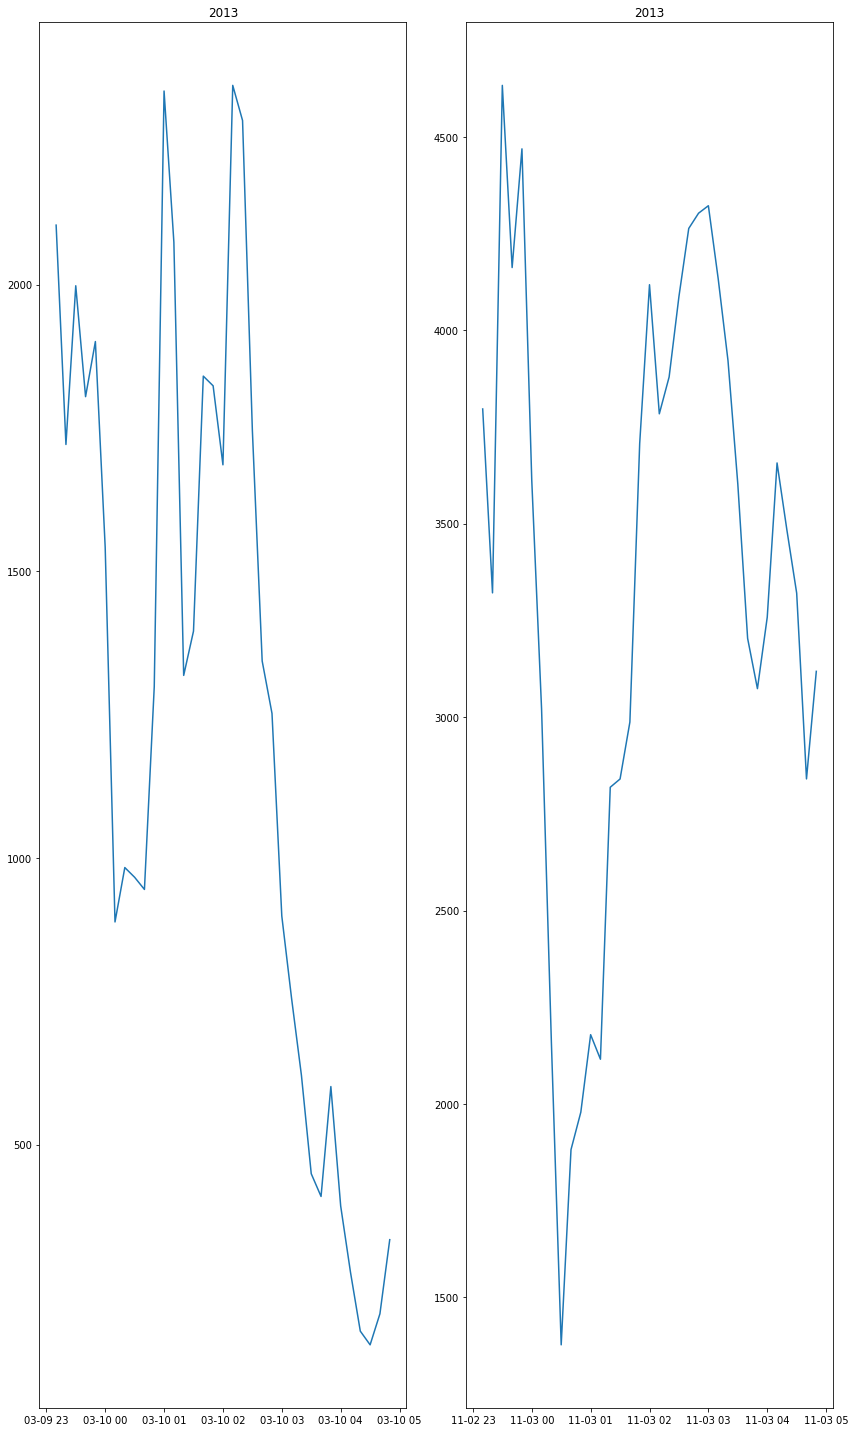

In [15]:
qc.daylight_savings_plot()

### Now we can be pretty sure that we do not have to apply a DST correction; we will only have to shift our data according to the timezone (i.e. we want our data in UTC).

### To do so, we can look at a diurnal plot that compares hourly average power values from the Wind Toolkit (UTC) and our dataset (timezone = ?).

### From this plot, we can see that there is a shift of roughly ____ hours. To confirm, we can check our hour shift Series:

In [16]:
qc._hour_shift

,Hour Shift Correlation
0,-0.117647
1,0.111925
2,0.309655
3,0.479875
4,0.625424
5,0.745092
6,0.831142
7,0.866125
8,0.845016
9,0.754371


### This series represents the correlation between the UTC Wind Toolkit values and our dataset. Each entry represents the correlation if we were to shift our dataset by x hours.

### From this plot, we can infer that our dataset is in local () time. This is corroborated by our diurnal plot. To shift our data to UTC, we need to move our data over by ____ hours.

### Now that we have gathered some useful information about our timeseries, the one last check we may want to make is to inspect each turbine profile. We can look at each turbine's power curve and perform an initial scan for irregularities.

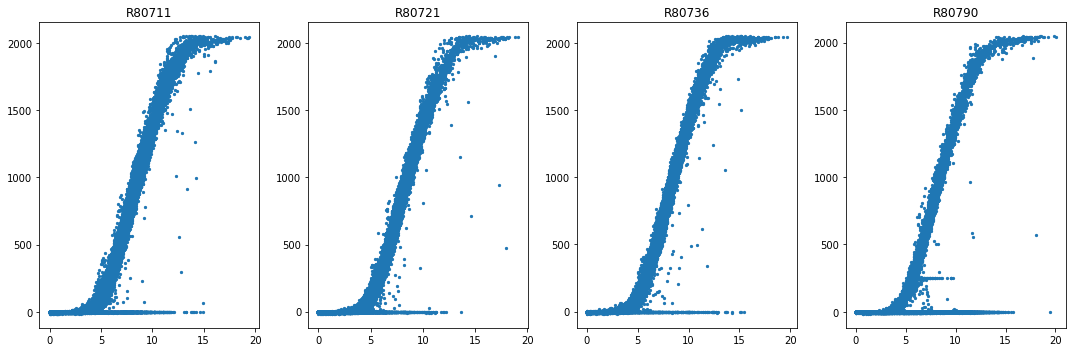

In [17]:
qc.turb_plots()

### Overall, these plots do not look too unusual. We will, however, want to filter them to flag underperformance/curtailment events. That will occur in the next tutorial. 

## Step 4: Performing adjustments on our data

## Step 5: Double-checking with our QC diagnostic